In [11]:
import kagglehub
import matplotlib.pyplot as plt 
import seaborn as sns   
import pandas as pd
import numpy as np

In [12]:
# Download dataser
path = kagglehub.dataset_download("chopper53/machine-learning-engineer-salary-in-2024")
print("Path to dataset files:", path)
salary_df = pd.read_csv("/Users/bonnieyuan/.cache/kagglehub/datasets/chopper53/machine-learning-engineer-salary-in-2024/versions/1/salaries.csv")
salary_df.head()

Path to dataset files: /Users/bonnieyuan/.cache/kagglehub/datasets/chopper53/machine-learning-engineer-salary-in-2024/versions/1


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


# EDA
## Categorical Variables

In [13]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


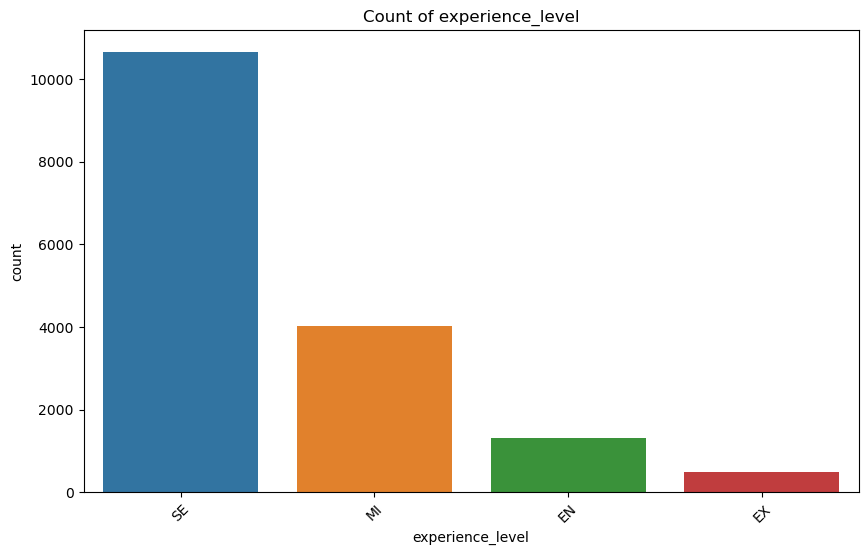

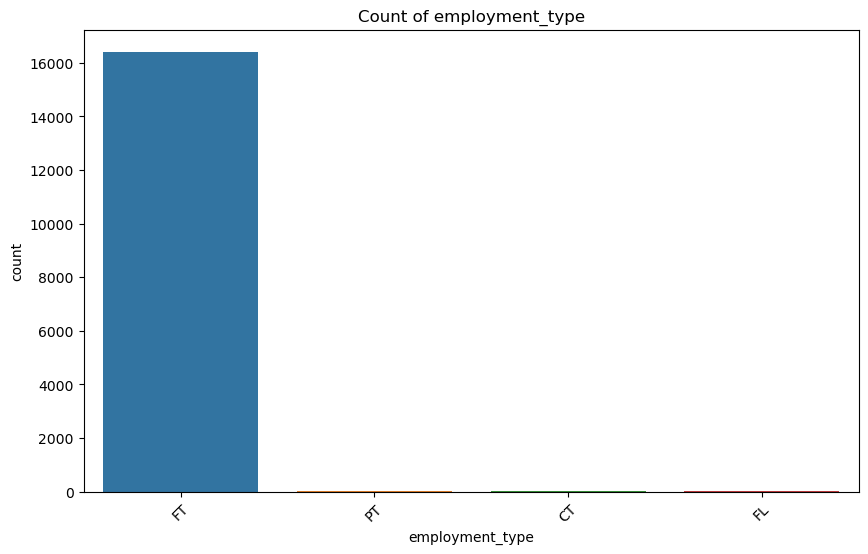

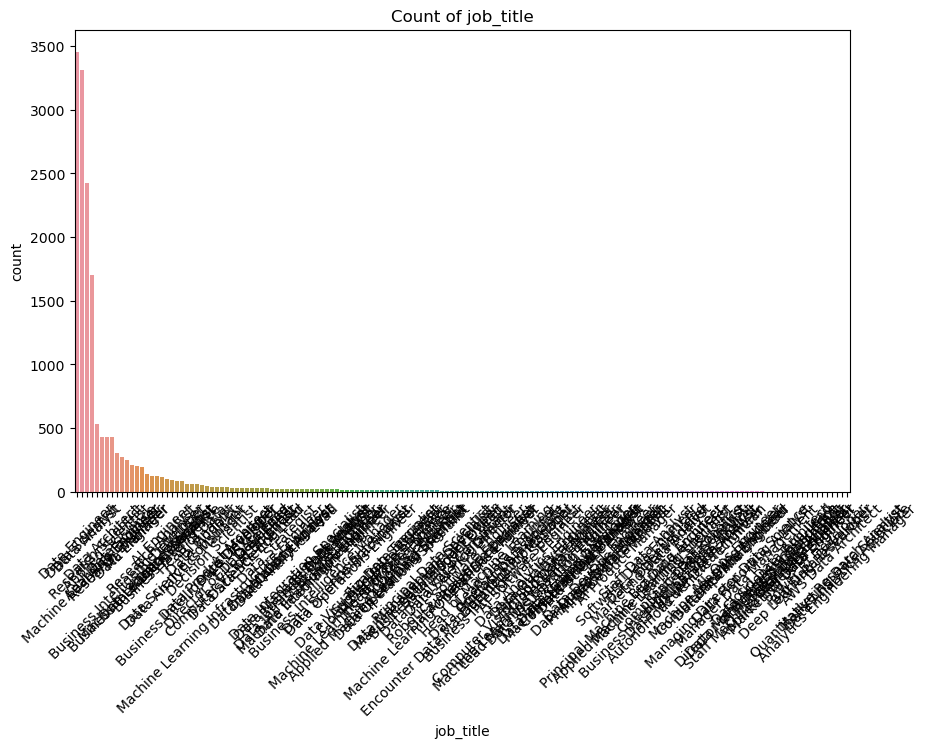

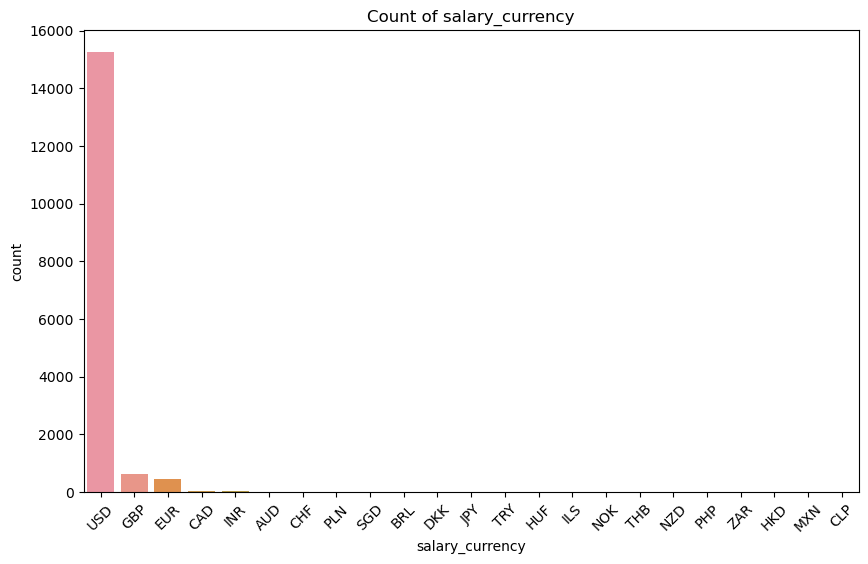

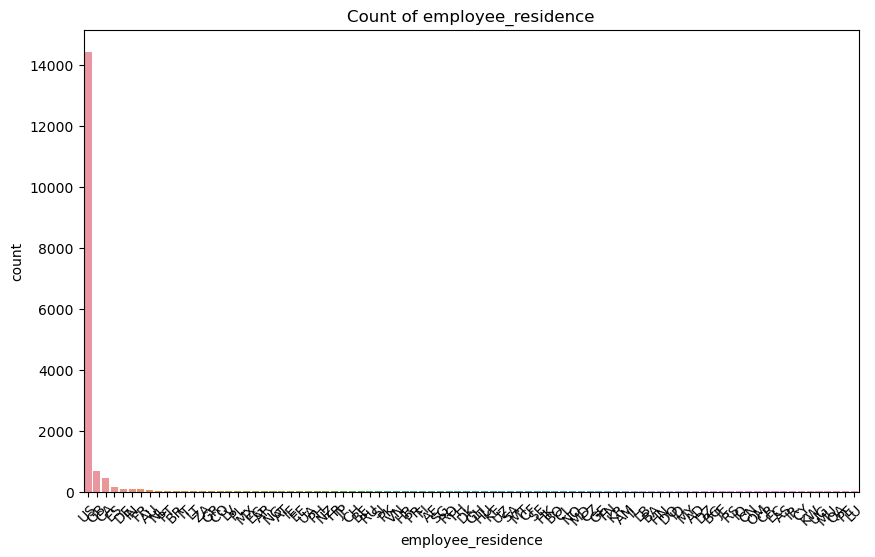

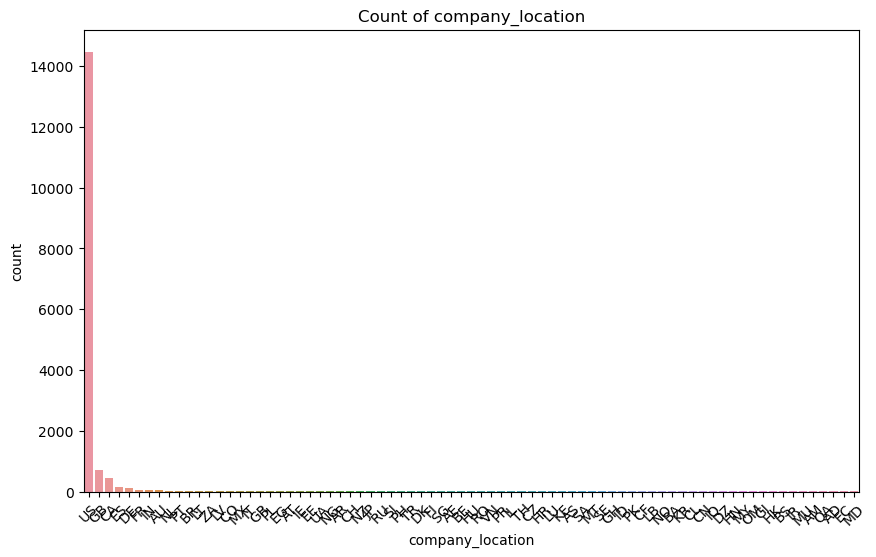

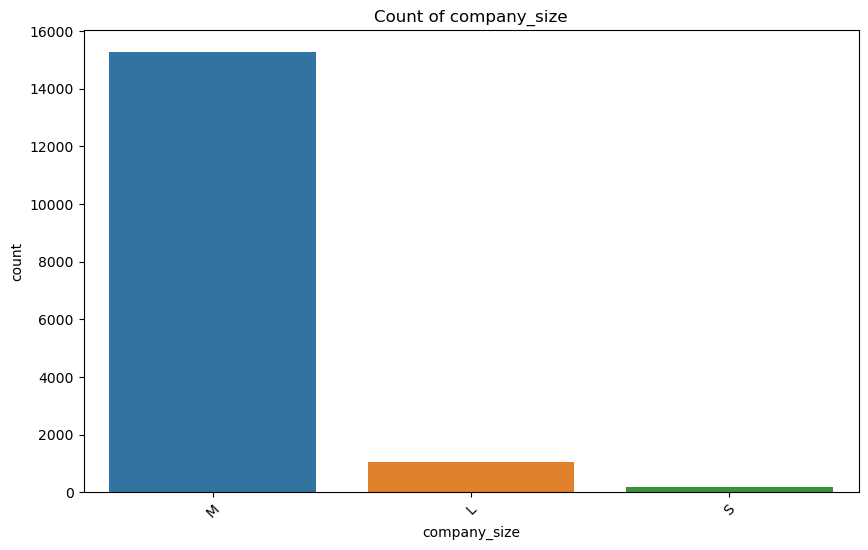

In [5]:
# plot all categorical data
categorical_columns = salary_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=salary_df, x=column, order=salary_df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    plt.show()  

In [15]:
# update company location to US and non-US
salary_df['company_loc'] = salary_df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')  
# employee location to US and non-US
salary_df['employee_loc'] = salary_df['employee_residence'].apply(lambda x: 'US' if x == 'US' else 'Non-US') 

In [17]:
salary_df[['company_loc','company_location']].value_counts()

company_loc  company_location
US           US                  14478
Non-US       GB                    694
             CA                    455
             ES                    133
             DE                    105
                                 ...  
             IQ                      1
             IR                      1
             MD                      1
             OM                      1
             AD                      1
Name: count, Length: 77, dtype: int64

In [19]:
salary_df[['employee_loc', 'employee_residence']].value_counts() 

employee_loc  employee_residence
US            US                    14427
Non-US        GB                      686
              CA                      453
              ES                      137
              DE                       98
                                    ...  
              KW                        1
              LU                        1
              MU                        1
              MY                        1
              IR                        1
Name: count, Length: 88, dtype: int64

In [87]:
salary_df['salary_currency'].value_counts()

salary_currency
USD    15254
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
NZD        1
PHP        1
ZAR        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64

In [88]:
salary_df['employee_residence'].value_counts()

employee_residence
US    14427
GB      686
CA      453
ES      137
DE       98
      ...  
UG        1
MU        1
QA        1
PE        1
LU        1
Name: count, Length: 88, dtype: int64

In [89]:
# check for missing values
print(salary_df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [90]:
salary_df['job_title'].value_counts()

job_title
Data Engineer                    3456
Data Scientist                   3312
Data Analyst                     2428
Machine Learning Engineer        1703
Research Scientist                529
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: count, Length: 155, dtype: int64

In [91]:
# separete job titles into two varables, function, and level
job_titles = salary_df['job_title'].unique()
def get_role_type(title):
    title = title.lower()
    if any(x in title for x in ['scientist', 'research', 'modeler', 'decision']):
        return 'Modeling/Research'
    elif any(x in title for x in ['engineer', 'developer', 'architect', 'devops']):
        return 'Engineering/Infrastructure'
    elif any(x in title for x in ['analyst', 'analytics', 'bi ', 'insight']):
        return 'Analytics/Insight'
    elif any(x in title for x in ['manager', 'lead', 'head', 'director', 'strategist', 'owner']):
        return 'Leadership/Strategy'
    elif any(x in title for x in ['ops', 'operations']):
        return 'Operations/MLOps'
    elif any(x in title for x in ['specialist', 'consultant', 'practitioner']):
        return 'Specialist/Support'
    else:
        return 'Other'

# Function to classify job_level
def get_job_level(title):
    title = title.lower()
    if any(x in title for x in ['intern', 'associate']):
        return 'Entry'
    elif any(x in title for x in ['staff', 'senior']):
        return 'Senior'
    elif any(x in title for x in ['lead', 'principal']):
        return 'Senior/Lead'
    elif any(x in title for x in ['manager', 'director', 'head', 'chief']):
        return 'Executive'
    elif any(x in title for x in ['analyst', 'engineer', 'scientist', 'developer']):
        return 'Mid'
    else:
        return 'Other'

# Apply both
salary_df['role_type'] = salary_df['job_title'].apply(get_role_type)
salary_df['job_level'] = salary_df['job_title'].apply(get_job_level)

In [92]:
salary_df['job_level'].value_counts()

job_level
Mid            14502
Other           1243
Executive        599
Senior/Lead      137
Entry              7
Senior             6
Name: count, dtype: int64

In [93]:
salary_df['role_type'].value_counts()

role_type
Engineering/Infrastructure    7218
Modeling/Research             5055
Analytics/Insight             2935
Leadership/Strategy            631
Other                          394
Specialist/Support             243
Operations/MLOps                18
Name: count, dtype: int64

In [105]:
# since we have the experience level so we just keep the role type.
salary_df[['job_title','role_type','job_level','experience_level']] 


,job_title,role_type,job_level,experience_level
0,Data Scientist,Modeling/Research,Mid,MI
1,Data Scientist,Modeling/Research,Mid,MI
2,Data Scientist,Modeling/Research,Mid,MI
3,Data Scientist,Modeling/Research,Mid,MI
4,Data Science Manager,Leadership/Strategy,Executive,MI
...,...,...,...,...
16489,Data Scientist,Modeling/Research,Mid,SE
16490,Principal Data Scientist,Modeling/Research,Senior/Lead,MI
16491,Data Scientist,Modeling/Research,Mid,EN
16492,Business Data Analyst,Analytics/Insight,Mid,EN


In [95]:
salary_df['experience_level'].value_counts()


experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [96]:
salary_df['employment_type'].value_counts() # full-time is the most common employment type

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

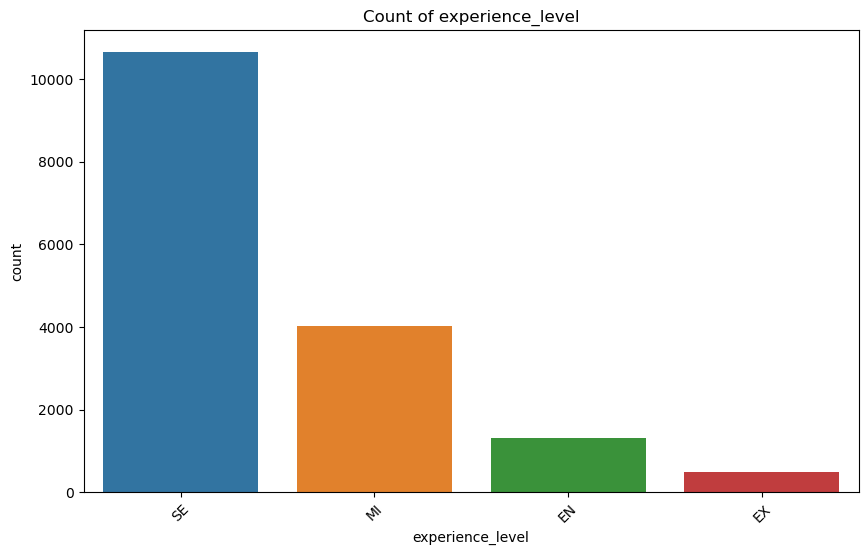

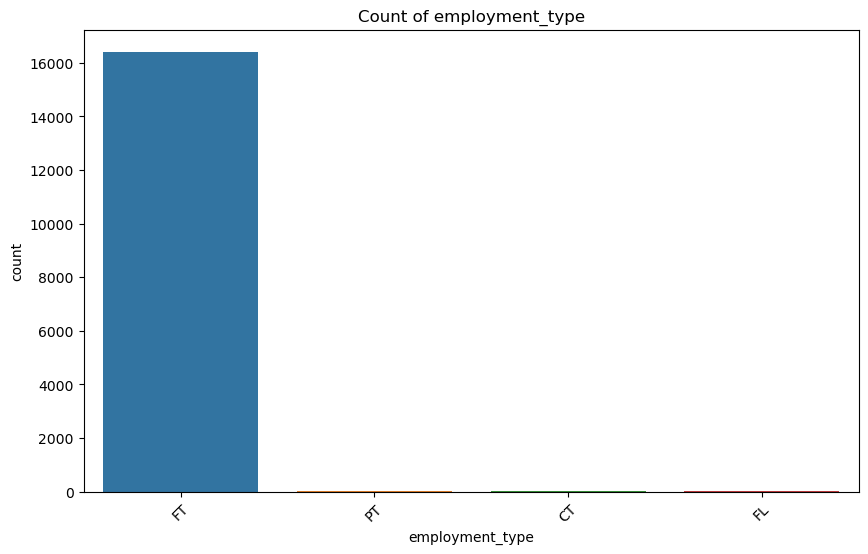

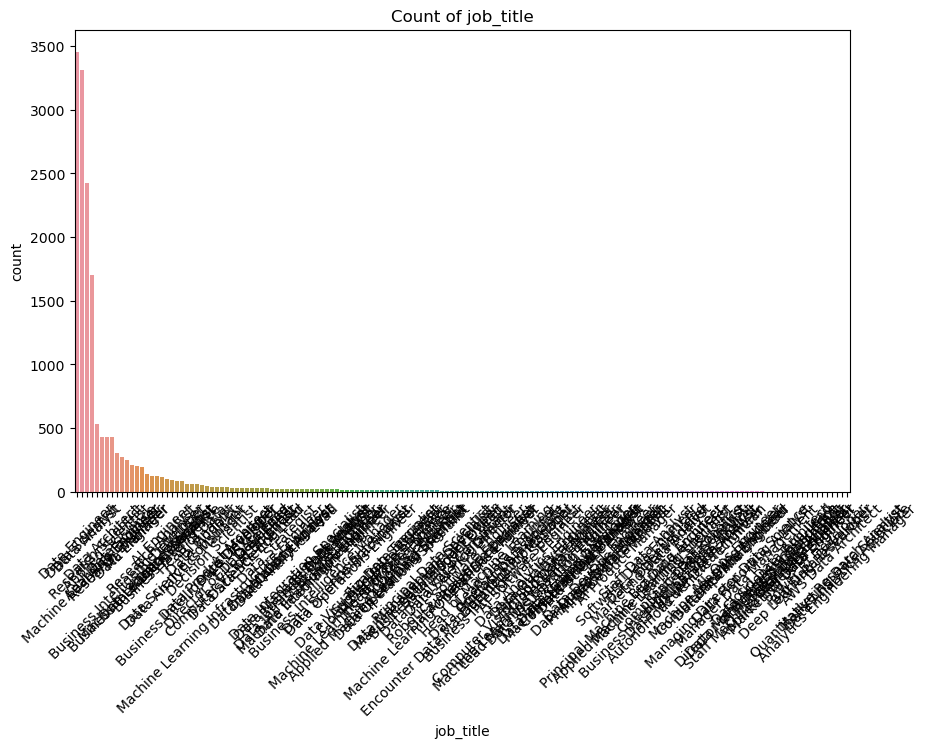

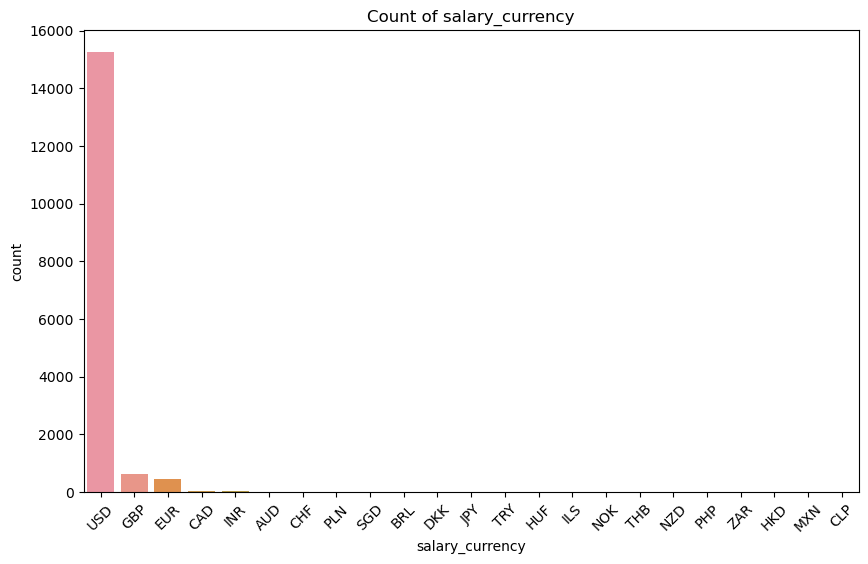

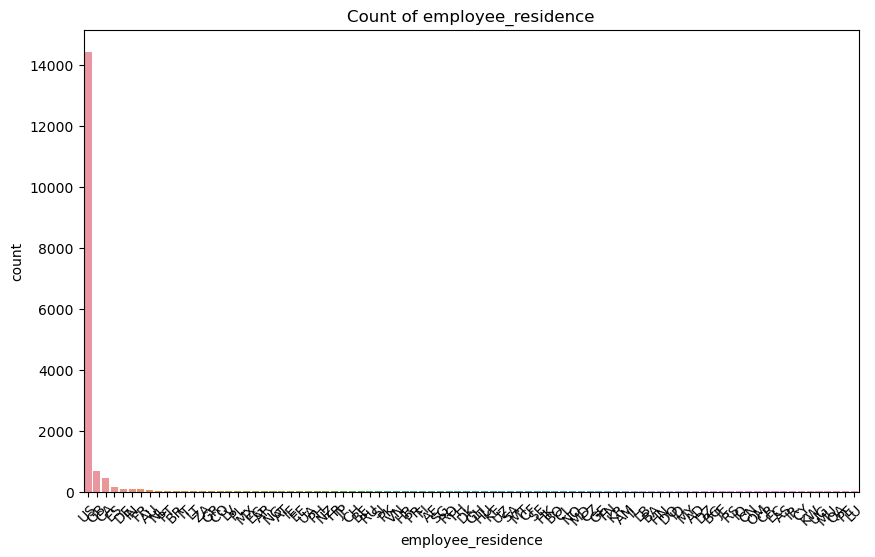

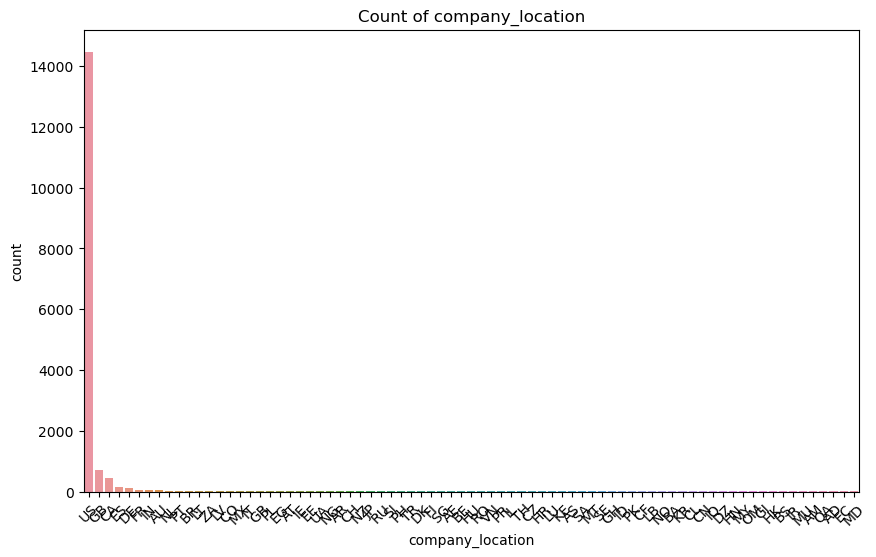

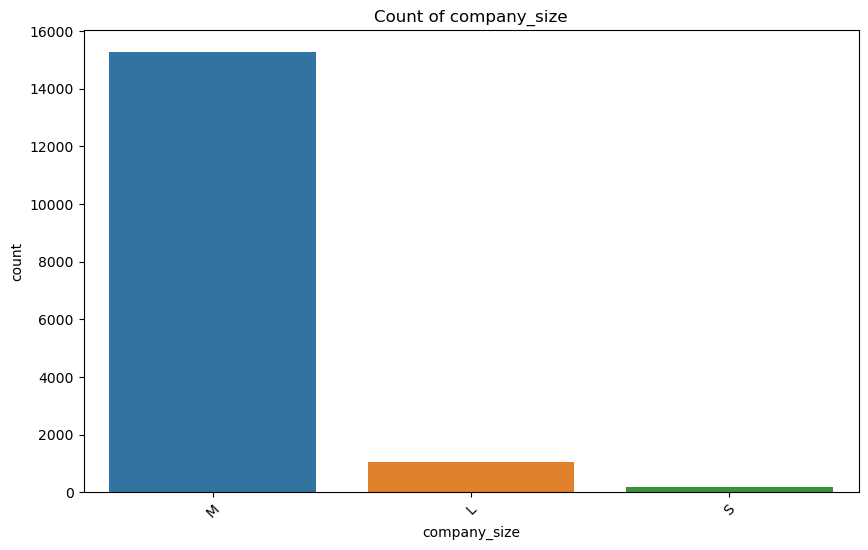

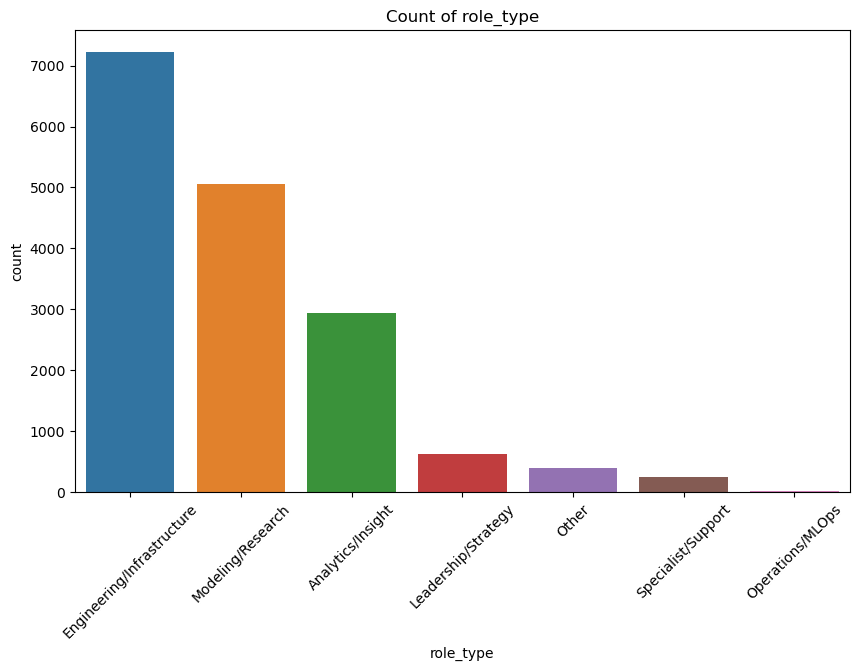

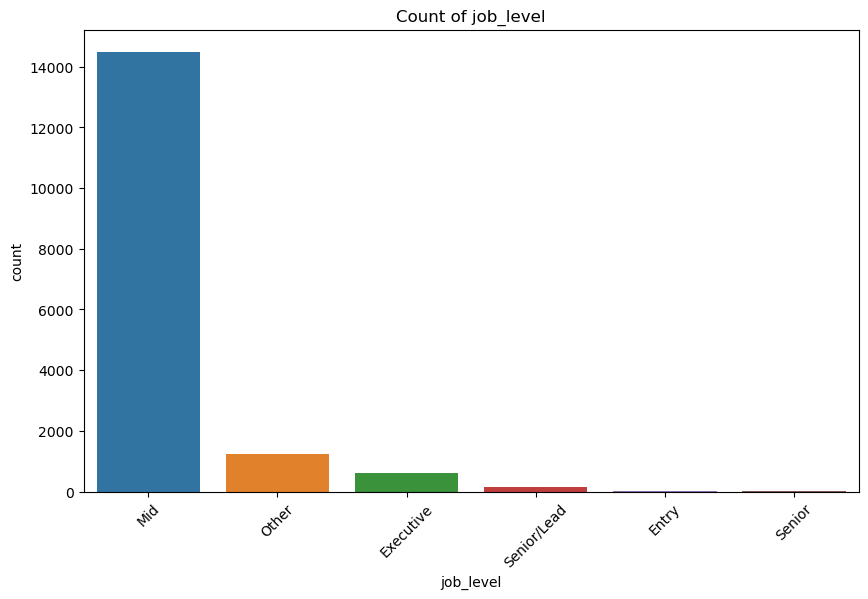

## Continuous variables 

In [98]:
df_num = salary_df[['work_year','salary','salary_in_usd','remote_ratio']]
df_num.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


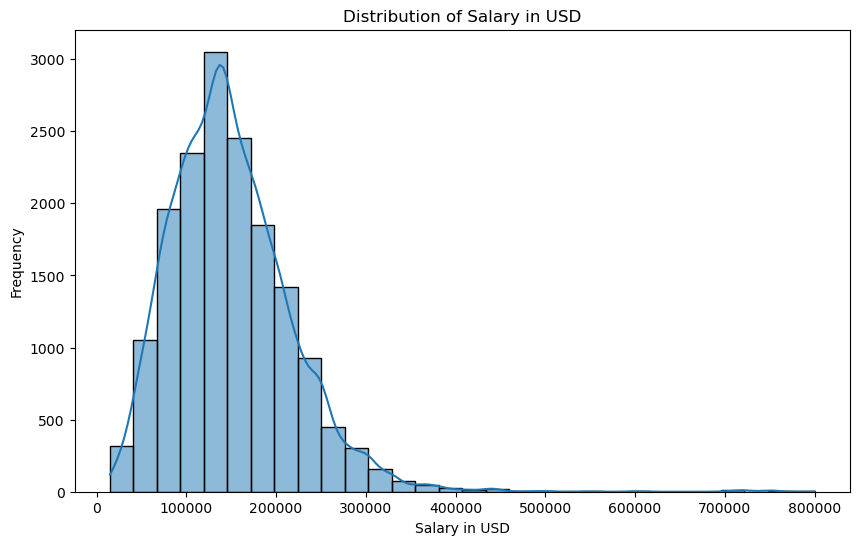

In [99]:
# plot histogram of salary and log  salary
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


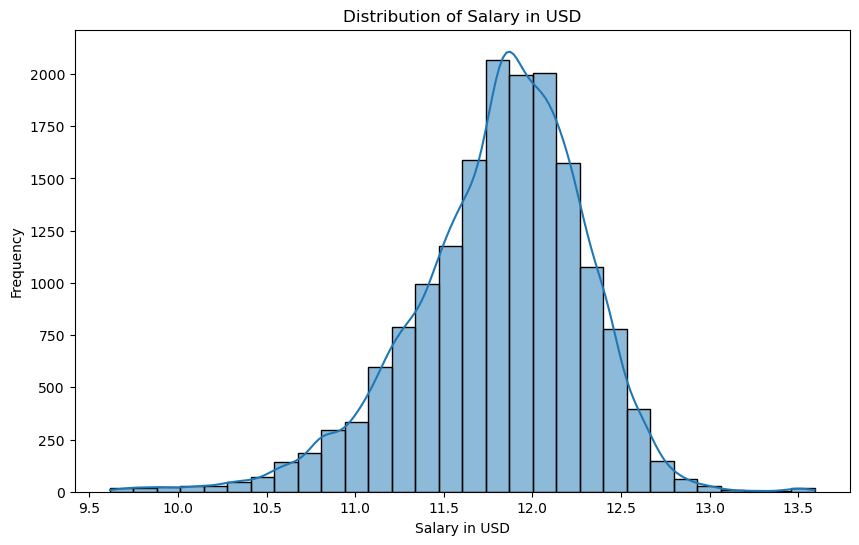

In [100]:

plt.figure(figsize=(10, 6))
sns.histplot(np.log(salary_df['salary_in_usd']), bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [101]:
#log transformed slary in usd
salary_df['salary_in_usd_log'] = np.log(salary_df['salary_in_usd'])

In [102]:
salary_df_cont = salary_df.select_dtypes(include=[np.number])
salary_df_cont

,work_year,salary,salary_in_usd,remote_ratio,salary_in_usd_log
0,2024,120000,120000,0,11.695247
1,2024,70000,70000,0,11.156251
2,2024,130000,130000,0,11.775290
3,2024,110000,110000,0,11.608236
4,2024,240000,240000,0,12.388394
...,...,...,...,...,...
16489,2020,412000,412000,100,12.928779
16490,2021,151000,151000,100,11.925035
16491,2020,105000,105000,100,11.561716
16492,2020,100000,100000,100,11.512925


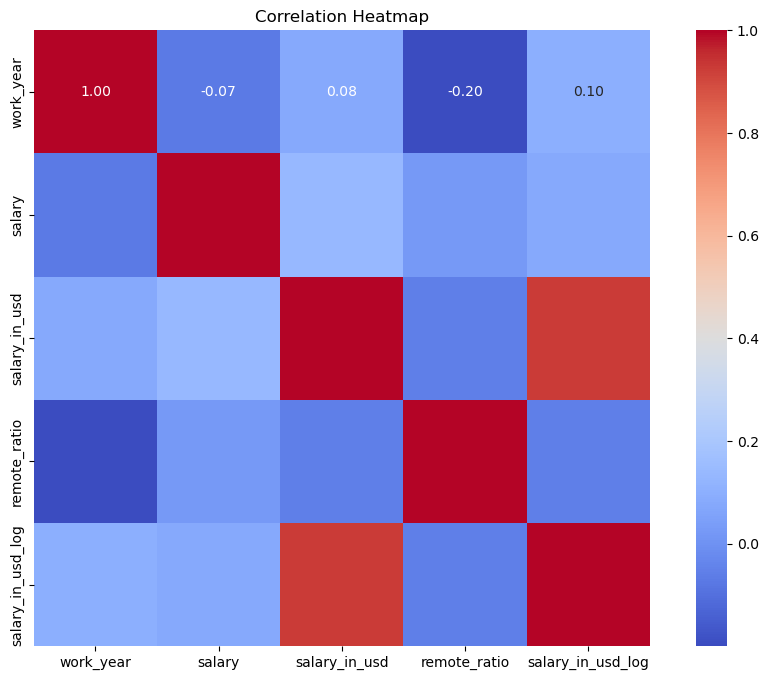

In [103]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(salary_df_cont.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df, x='work_year', y='salary_in_usd', hue='job_title_new', alpha=0.7)
plt.title('Salary in USD vs Work Year by Job Title')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ValueError: Could not interpret value `job_title_new` for parameter `hue`

<Figure size 1000x600 with 0 Axes>